In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import torch
from src.datasets.ice import IceForVisualizing
import os

def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

import matplotlib

latex = True
#plotting and colour set ups
if latex:
#     matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
#         'text.usetex': True,
        'pgf.rcfonts': False,
    })

In [18]:
val = 25
for img_number in range(1,51):
    img_path = f'/home/dsola/repos/PGA-Net/data/imgs/img_{img_number}.tif'
    mask_path = f'/home/dsola/repos/PGA-Net/data/masks/img_{img_number}.tif'
    img = cv2.imread(img_path)
    mask = plt.imread(mask_path)[:,:,0]
    img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean_val = img_gr[(mask==0)].mean()

    if mean_val > val:
        lower = True
    else:
        lower = False

    gamma = 1
    if lower:
        while mean_val > val:
            gamma -= 0.01
            img_shift = adjust_gamma(img, gamma=gamma)
            img_gr = cv2.cvtColor(img_shift, cv2.COLOR_BGR2GRAY)
            mean_val = img_gr[(mask==0)].mean()
    else:
        while mean_val < val:
            gamma += 0.01
            img_shift = adjust_gamma(img, gamma=gamma)
            img_gr = cv2.cvtColor(img_shift, cv2.COLOR_BGR2GRAY)
            mean_val = img_gr[(mask==0)].mean()
    im = Image.fromarray(img_shift)
    save_path = f'/home/dsola/repos/PGA-Net/data/illumination_shift_{val}/img_{img_number}.tif'
    im.save(save_path)

In [ ]:
# light: 11, 14, 19, 20, 44, 
# dark: 50, 48, 30, 16, 7

In [54]:
train_imgs = ['img_31.tif', 'img_34.tif', 'img_32.tif', 'img_45.tif', 'img_18.tif', 'img_40.tif', 'img_17.tif', 'img_12.tif', 'img_20.tif', 'img_29.tif', 'img_14.tif', 'img_33.tif', 'img_21.tif', 'img_47.tif', 'img_43.tif', 'img_6.tif', 'img_27.tif', 'img_1.tif', 'img_36.tif', 'img_42.tif', 'img_24.tif', 'img_10.tif', 'img_5.tif', 'img_28.tif', 'img_41.tif', 'img_25.tif', 'img_38.tif', 'img_48.tif', 'img_11.tif', 'img_46.tif']
test_imgs = ['img_49.tif', 'img_19.tif', 'img_50.tif', 'img_35.tif', 'img_4.tif', 'img_7.tif', 'img_2.tif', 'img_39.tif', 'img_23.tif', 'img_22.tif']

train_means, test_means = [], []

for img_number in train_imgs:
    img_path = f'/home/dsola/repos/PGA-Net/data/imgs/{img_number}'
    mask_path = f'/home/dsola/repos/PGA-Net/data/masks/{img_number}'
    img = cv2.imread(img_path)
    mask = plt.imread(mask_path)[:,:,0]
    img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean_val = img_gr[(mask==0)].mean()
    train_means.append(mean_val)

for img_number in test_imgs:
    img_path = f'/home/dsola/repos/PGA-Net/data/imgs/{img_number}'
    mask_path = f'/home/dsola/repos/PGA-Net/data/masks/{img_number}'
    img = cv2.imread(img_path)
    mask = plt.imread(mask_path)[:,:,0]
    img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean_val = img_gr[(mask==0)].mean()
    test_means.append(mean_val)

In [55]:
print('train means: ', np.mean(train_means), train_means)
print('test means: ', np.mean(test_means), test_means)

train means:  99.79209863884532 [109.05767891758025, 93.11341056991768, 105.10026912921184, 72.7238546002531, 106.06113203571523, 82.8590449916048, 103.3639802617443, 109.95514379672075, 113.62251678372218, 106.38547449618542, 116.55734735821079, 95.37096030676175, 95.39595071716991, 100.44077332667749, 93.14524767017504, 103.59835628448498, 94.79002005400015, 98.77383851178817, 102.20295536105282, 94.67814173299058, 89.37764949245823, 111.70795332309865, 103.38409090351679, 103.55112753880572, 89.39590667523056, 104.06270200888535, 105.38942130309775, 65.31130965752807, 124.50337228841235, 99.883329068359]
test means:  96.31380283482203 [77.59229821857608, 118.99039804711263, 72.52391671807032, 98.65053089805183, 108.640019678349, 78.20923079978607, 95.45527573312762, 104.67416096369139, 102.63967843812804, 105.76251885332722]


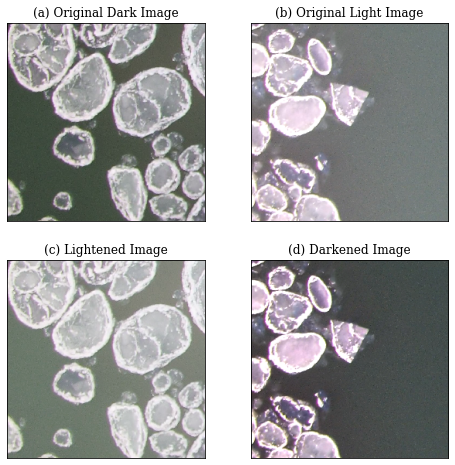

In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data_dir = '/home/dsola/repos/PGA-Net/data/'
batch_size = 1
img_crop = 256
img_scale = 0.35

tarin_set_orig = IceForVisualizing(os.path.join(data_dir, 'imgs'), os.path.join(data_dir, 'masks'),
              os.path.join(data_dir, 'txt_files'), 'train', img_scale, img_crop)

tarin_set_75 = IceForVisualizing(os.path.join(data_dir, 'illumination_shift_75'), os.path.join(data_dir, 'masks'),
              os.path.join(data_dir, 'txt_files'), 'train', img_scale, img_crop)

tarin_set_120 = IceForVisualizing(os.path.join(data_dir, 'illumination_shift_120'), os.path.join(data_dir, 'masks'),
              os.path.join(data_dir, 'txt_files'), 'train', img_scale, img_crop)

val_set_orig = IceForVisualizing(os.path.join(data_dir, 'imgs'), os.path.join(data_dir, 'masks'),
              os.path.join(data_dir, 'txt_files'), 'val', img_scale, img_crop)

val_set_75 = IceForVisualizing(os.path.join(data_dir, 'illumination_shift_75'), os.path.join(data_dir, 'masks'),
              os.path.join(data_dir, 'txt_files'), 'val', img_scale, img_crop)

val_set_120 = IceForVisualizing(os.path.join(data_dir, 'illumination_shift_120'), os.path.join(data_dir, 'masks'),
              os.path.join(data_dir, 'txt_files'), 'val', img_scale, img_crop)

img_7 = val_set_75[5]['img_orig'].to(device=device)
img_11 = tarin_set_120[28]['img_orig'].to(device=device)
img_7_shift = val_set_120[5]['img_orig'].to(device=device)
img_11_shift = tarin_set_75[28]['img_orig'].to(device=device)

fig, axs = plt.subplots(2, 2, figsize=(8,8))
img_7_np = img_7.permute(0, 2, 1).detach().cpu().numpy()
img_11_np = img_11.permute(0, 2, 1).detach().cpu().numpy()
img_7_shift_np = img_7_shift.permute(0, 2, 1).detach().cpu().numpy()
img_11_shift_np = img_11_shift.permute(0, 2, 1).detach().cpu().numpy()

axs[0][0].imshow(np.flipud(np.rot90(img_7_np)))
axs[0][0].set_xticklabels([])
axs[0][0].set_yticklabels([])
axs[0][0].tick_params(axis=u'both', which=u'both',length=0)
axs[0][0].set_title('(a) Original Dark Image')

axs[0][1].imshow(np.flipud(np.rot90(img_11_np)))
axs[0][1].set_xticklabels([])
axs[0][1].set_yticklabels([])
axs[0][1].tick_params(axis=u'both', which=u'both',length=0)
axs[0][1].set_title('(b) Original Light Image')

axs[1][0].imshow(np.flipud(np.rot90(img_7_shift_np)))
axs[1][0].set_xticklabels([])
axs[1][0].set_yticklabels([])
axs[1][0].tick_params(axis=u'both', which=u'both',length=0)
axs[1][0].set_title('(c) Lightened Image')

axs[1][1].imshow(np.flipud(np.rot90(img_11_shift_np)))
axs[1][1].set_xticklabels([])
axs[1][1].set_yticklabels([])
axs[1][1].tick_params(axis=u'both', which=u'both',length=0)
axs[1][1].set_title('(d) Darkened Image');

In [33]:
# fig.savefig("../images/illumination.svg", format='svg', dpi=1200)

In [ ]:
img_number = 11
img_path = f'/home/dsola/repos/PGA-Net/data/imgs/img_{img_number}.tif'
mask_path = f'/home/dsola/repos/PGA-Net/data/masks/img_{img_number}.tif'
img = cv2.imread(img_path)
mask = plt.imread(mask_path)[:,:,0]
img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mean_val = img_gr[(mask==0)].mean()
plt.imshow(img)
plt.title(f'water mean: {mean_val}');

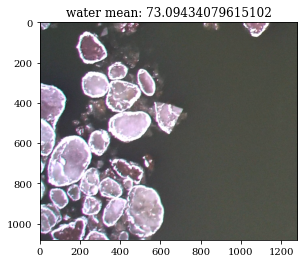

In [5]:
img_number = 11
img_path = f'/home/dsola/repos/PGA-Net/data/illumination_shift_75/img_{img_number}.tif'
mask_path = f'/home/dsola/repos/PGA-Net/data/masks/img_{img_number}.tif'
img = cv2.imread(img_path)
mask = plt.imread(mask_path)[:,:,0]
img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mean_val = img_gr[(mask==0)].mean()
plt.imshow(img)
plt.title(f'water mean: {mean_val}');

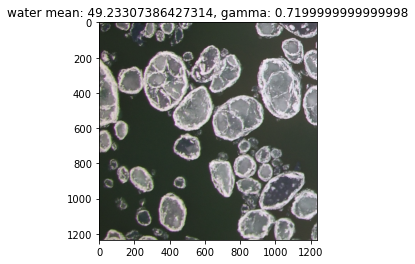

In [7]:
# scale dark to mean water val of 75
val = 50

img_number = 7
img_path = f'/home/dsola/repos/PGA-Net/data/imgs/img_{img_number}.tif'
mask_path = f'/home/dsola/repos/PGA-Net/data/masks/img_{img_number}.tif'
img = cv2.imread(img_path)
mask = plt.imread(mask_path)[:,:,0]
img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mean_val = img_gr[(mask==0)].mean()
plt.imshow(img)
plt.title(f'water mean: {mean_val}');

if mean_val > val:
    lower = True
else:
    lower = False
    
gamma = 1
if lower:
    while mean_val > val:
        gamma -= 0.01
        img_shift = adjust_gamma(img, gamma=gamma)
        img_gr = cv2.cvtColor(img_shift, cv2.COLOR_BGR2GRAY)
        mean_val = img_gr[(mask==0)].mean()
else:
    while mean_val < val:
        gamma += 0.01
        img_shift = adjust_gamma(img, gamma=gamma)
        img_gr = cv2.cvtColor(img_shift, cv2.COLOR_BGR2GRAY)
        mean_val = img_gr[(mask==0)].mean()
plt.imshow(img_shift)
plt.title(f'water mean: {mean_val}, gamma: {gamma}');

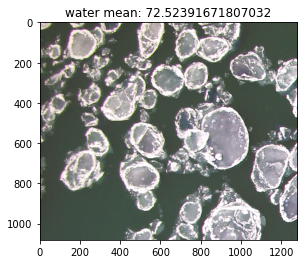

In [43]:
light_imgs = [11,14,19,20,44]
dark_imgs = [7,16,30,48,50]
light_means, dark_means = [], []

for img_number in light_imgs:
    img_path = f'/home/dsola/repos/PGA-Net/data/imgs/img_{img_number}.tif'
    mask_path = f'/home/dsola/repos/PGA-Net/data/masks/img_{img_number}.tif'
    img = cv2.imread(img_path)
    mask = plt.imread(mask_path)[:,:,0]
    img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean_val = img_gr[(mask==0)].mean()
    light_means.append(mean_val)

for img_number in dark_imgs:
    img_path = f'/home/dsola/repos/PGA-Net/data/imgs/img_{img_number}.tif'
    mask_path = f'/home/dsola/repos/PGA-Net/data/masks/img_{img_number}.tif'
    img = cv2.imread(img_path)
    mask = plt.imread(mask_path)[:,:,0]
    img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean_val = img_gr[(mask==0)].mean()
    dark_means.append(mean_val)

In [44]:
print('light means: ', light_means, np.mean(light_means))
print('dark means: ', dark_means, np.mean(dark_means))

light means:  [124.50337228841235, 116.55734735821079, 118.99039804711263, 113.62251678372218, 116.02344692301641] 117.93941628009486
dark means:  [78.20923079978607, 88.81266109769099, 89.70599017050742, 65.31130965752807, 72.52391671807032] 78.91262168871658


In [45]:
light_imgs = [11,14,19,20,44]
dark_imgs = [7,16,30,48,50]
light_means, dark_means = [], []

for img_number in light_imgs:
    img_path = f'/home/dsola/repos/PGA-Net/data/imgs/img_{img_number}.tif'
    mask_path = f'/home/dsola/repos/PGA-Net/data/masks/img_{img_number}.tif'
    img = cv2.imread(img_path)
    mask = plt.imread(mask_path)[:,:,0]
    img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean_val = img_gr[(mask==1)].mean()
    light_means.append(mean_val)

for img_number in dark_imgs:
    img_path = f'/home/dsola/repos/PGA-Net/data/imgs/img_{img_number}.tif'
    mask_path = f'/home/dsola/repos/PGA-Net/data/masks/img_{img_number}.tif'
    img = cv2.imread(img_path)
    mask = plt.imread(mask_path)[:,:,0]
    img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean_val = img_gr[(mask==1)].mean()
    dark_means.append(mean_val)

print('light means: ', light_means, np.mean(light_means))
print('dark means: ', dark_means, np.mean(dark_means))

light means:  [165.03299599068805, 175.6249533756061, 181.24748234749393, 164.69946515440643, 174.5950812034079] 172.23999561432046
dark means:  [134.96422755777292, 149.5758904438705, 154.48691197019096, 117.28262319147727, 151.08479901115032] 141.4788904348924


In [46]:
light_imgs = [11,14,19,20,44]
dark_imgs = [7,16,30,48,50]
light_means, dark_means = [], []

for img_number in light_imgs:
    img_path = f'/home/dsola/repos/PGA-Net/data/imgs/img_{img_number}.tif'
    mask_path = f'/home/dsola/repos/PGA-Net/data/masks/img_{img_number}.tif'
    img = cv2.imread(img_path)
    mask = plt.imread(mask_path)[:,:,0]
    img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean_val = img_gr[(mask==2)].mean()
    light_means.append(mean_val)

for img_number in dark_imgs:
    img_path = f'/home/dsola/repos/PGA-Net/data/imgs/img_{img_number}.tif'
    mask_path = f'/home/dsola/repos/PGA-Net/data/masks/img_{img_number}.tif'
    img = cv2.imread(img_path)
    mask = plt.imread(mask_path)[:,:,0]
    img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean_val = img_gr[(mask==2)].mean()
    dark_means.append(mean_val)

print('light means: ', light_means, np.mean(light_means))
print('dark means: ', dark_means, np.mean(dark_means))

light means:  [212.44811560804646, 214.82487137171148, 198.54608731106387, nan, 216.15590072749205] nan
dark means:  [171.06077707526876, 193.0137730806151, 181.25603111080966, 163.90306100442353, 171.09696463869975] 176.06612138196337


<ipython-input-46-478847b9d159>:11: RuntimeWarning: Mean of empty slice.
  mean_val = img_gr[(mask==2)].mean()
/home/dsola/anaconda3/envs/PGA-Net/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [53]:
(np.sum(light_means[:3]) + light_means[-1])/4

210.49374375457847